Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB

import warnings
warnings.filterwarnings('ignore')

Loading Data

In [2]:
#df = pd.read_csv("D:/Year3/ML/adult.csv")
df = pd.read_csv("adult.csv")

In [3]:
df.head(30)
df.shape

(48842, 15)

In [4]:
pd.concat([df.nunique(),df.dtypes])#view all features, amount of unique entries and datatype

age                    74
workclass               9
fnlwgt              28523
education              16
educational-num        16
marital-status          7
occupation             15
relationship            6
race                    5
gender                  2
capital-gain          123
capital-loss           99
hours-per-week         96
native-country         42
income                  2
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
df.groupby(['education','educational-num']).size()

education     educational-num
10th          6                   1389
11th          7                   1812
12th          8                    657
1st-4th       2                    247
5th-6th       3                    509
7th-8th       4                    955
9th           5                    756
Assoc-acdm    12                  1601
Assoc-voc     11                  2061
Bachelors     13                  8025
Doctorate     16                   594
HS-grad       9                  15784
Masters       14                  2657
Preschool     1                     83
Prof-school   15                   834
Some-college  10                 10878
dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

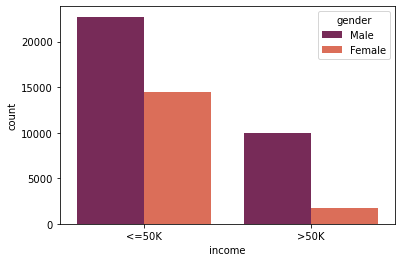

In [6]:
sns.countplot(df['income'],palette='rocket',hue='gender',data=df)#plot barchart 

Data Cleaning

In [7]:
df = df[df != '?']#removing '?' entries 
df = df.dropna()#dropping rows with empty entires
df['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [8]:
"""Loop to check if all entires with '?' are removed"""
for i in df:
    if "?" in df[i].value_counts():
        print("Remove \'?\' from: "+i)
#if nothing is returned data is clean from unknown entries

Feature cleaning

In [9]:
#categorised agains educational-num
df.education = df.education.replace(['1st-4th','5th-6th'],'Primary education')#2-3
df.education = df.education.replace(['7th-8th','9th','10th','11th','12th'],'Secondary education')#4-8
df.education = df.education.replace(['Some-college','HS-grad','Assoc-voc','Assoc-acdm'],'Higher')#9-12
df.education = df.education.replace(['Bachelors'],'Under-Graduate')#13
df.education = df.education.replace(['Masters'],'Graduate')#14
df.education = df.education.replace(['Prof-school'],'Post-Graduate')#15
df['education'].value_counts()

Higher                 28148
Under-Graduate          7570
Secondary education     4918
Graduate                2514
Post-Graduate            785
Primary education        671
Doctorate                544
Preschool                 72
Name: education, dtype: int64

In [10]:
#Chnaging income to binary
df.income = df.income.replace(['<=50K'],0)
df.income = df.income.replace(['>50K'],1)
df['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [11]:
#Changing geneder entry to binary
df.gender = df.gender.replace(['Male'], 1)
df.gender = df.gender.replace(['Female'], 0)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Secondary education,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,Higher,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,Higher,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,Higher,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
5,34,Private,198693,Secondary education,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,0


<AxesSubplot:>

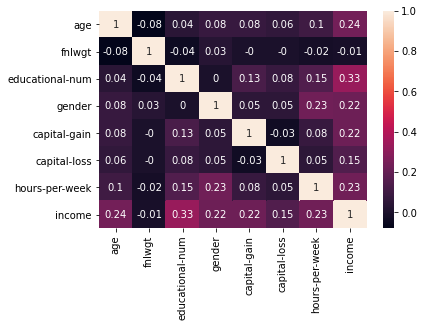

In [12]:
corr_matrix = df.corr().round(2) #creates correlation matrix
sns.heatmap(corr_matrix, annot=True)

In [26]:
df.drop(['fnlwgt','educational-num'],axis=1,inplace=True)
df.hist(figsize=(12,12),layout=(3,2),sharex=False)#creates grid od histograms for numerical features

KeyError: "['fnlwgt' 'educational-num'] not found in axis"

<AxesSubplot:xlabel='race', ylabel='count'>

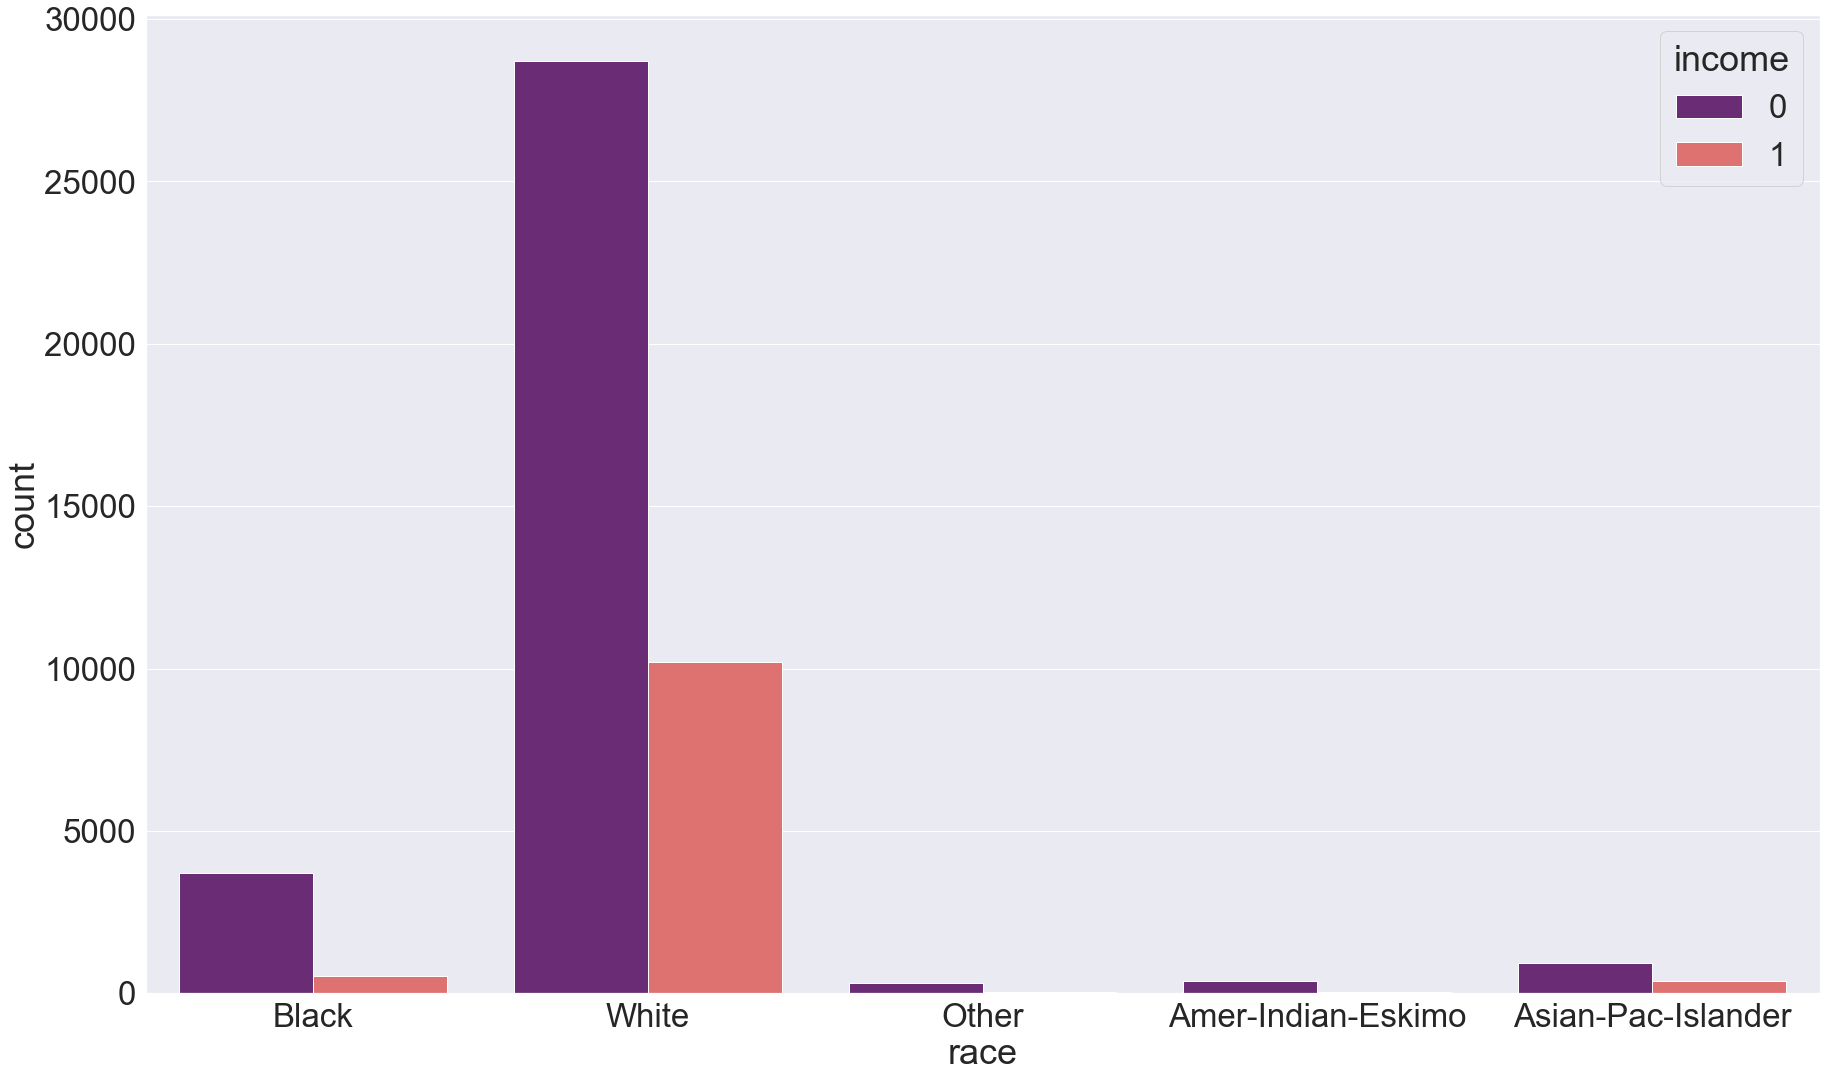

In [14]:
plt.figure(figsize=(30,18))
sns.set(font_scale=3)
sns.countplot( df['race'],hue='income',data=df,palette='magma')


Building model

In [15]:
df = df.apply(LabelEncoder().fit_transform)#changes text entries into numerical entries

x = df.iloc[:,:-1].values #allocates all the rows and all the columns accept the last one 
y = df.iloc[:,-1].values #allocates all the rows and the last column

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3) #splits the dataset in ratio of 70% train 30% test

standsca = StandardScaler().fit(x_train) #sets standard scaler and fits the data
x_train_scaled = standsca.transform(x_train) #centers and scales train data
x_test_scaled = standsca.transform(x_test) #centers and scales test data

Naive Bayes models

In [16]:
#Naive Bayes models
gnb = GaussianNB()
bnb = BernoulliNB()

model_list = []#empty list created for comparison of models


print("   Gaussian")
model_gnb = gnb.fit(x_train,y_train)    #fitting the model
y_pred = gnb.fit(x_train, y_train).predict(x_test)    #predicting Gaussian NB the target
print("Training accuracy: {:,.3f}".format(model_gnb.score(x_train,y_train)))
print("Testing accuracy: {:,.3f}".format(model_gnb.score(x_test,y_test)))
print("Total points: ", x_test.shape[0], "\nMiss matched points: ", (y_test != y_pred).sum(), "\nAccuracy: {:.3f}".format(accuracy_score(y_test,y_pred)))

print("\n   Bernoulli")
model_bnb = bnb.fit(x_train,y_train)    #fitting Bernoulli NB
y_pred = bnb.fit(x_train, y_train).predict(x_test)    #predicting Bernoulli NB the target
print("Training accuracy: {:,.3f}".format(model_bnb.score(x_train,y_train)))
print("Testing accuracy: {:,.3f}".format(model_bnb.score(x_test,y_test)))
print("Total points: ", x_test.shape[0], "\nMiss matched points: ", (y_test != y_pred).sum(), "\nAccuracy: {:.3f}".format(accuracy_score(y_test,y_pred)))


model_list.append(model_gnb)
model_list.append(model_bnb)

   Gaussian
Training accuracy: 0.791
Testing accuracy: 0.788
Total points:  13567 
Miss matched points:  2872 
Accuracy: 0.788

   Bernoulli
Training accuracy: 0.721
Testing accuracy: 0.723
Total points:  13567 
Miss matched points:  3753 
Accuracy: 0.723


Logistic Regression model

In [17]:
logistic = LogisticRegression()

model_log = logistic.fit(x_train,y_train) #logistic regression is fitted
y_test_pred = model_log.predict(x_test) #predicting Logistic Regression's target

print("Training accuracy: {:,.3f}".format(model_log.score(x_train,y_train)))
print("Testing accuracy: {:,.3f}".format(model_log.score(x_test,y_test)))

print("Total points: ", x_test.shape[0], "\nMiss matched points: ", (y_test != y_test_pred).sum(), "\nAccuracy: {:.3f}".format(accuracy_score(y_test,y_test_pred)))

model_list.append(model_log)

Training accuracy: 0.794
Testing accuracy: 0.793
Total points:  13567 
Miss matched points:  2809 
Accuracy: 0.793


K Nearest Neighbour model

In [18]:
knn = KNeighborsClassifier(n_neighbors=10,p=1)#hyper parameter tuning

model_knn = knn.fit(x_train,y_train)
y_test_pred = model_knn.predict(x_test)

print("Training accuracy: {:,.3f}".format(model_knn.score(x_train,y_train)))
print("Testing accuracy: {:,.3f}".format(model_knn.score(x_test,y_test)))

print("Total points: ", x_test.shape[0], "\nMiss matched points: ", (y_test != y_test_pred).sum(), "\nAccuracy: {:.3f}".format(accuracy_score(y_test,y_test_pred)))

model_list.append(model_knn)

Training accuracy: 0.863
Testing accuracy: 0.835
Total points:  13567 
Miss matched points:  2241 
Accuracy: 0.835


Cross Validation

In [19]:
"""Loop to choose most efficient algorithm"""

for i in range(len(model_list)):   #loops via all the models to compare 
    clf = cross_val_score(model_list[i],x,y,cv=5,scoring = 'accuracy') #Cross validating for checking how well models predict
    clf_rounded = clf.mean().round(5)
    print(model_list[i], ": ", clf_rounded)


GaussianNB() :  0.79105
BernoulliNB() :  0.72137
LogisticRegression() :  0.79333
KNeighborsClassifier(n_neighbors=10, p=1) :  0.83603


In [20]:
defaultThreshold = 0.5
newThreshold = 0.6
x_test = pd.DataFrame(x_test) #reforming X testing set
y_test_pred = model_knn.predict(x_test) 
y_train_pred = model_knn.predict(x_train)
new_y_test_pred = np.where(model_knn.predict_proba(x_test)[:,1]>newThreshold,1,0)

model_gnb.predict_proba(x_test)
#visual aid to see how the values are distribued with threshold
print("y_test\n",pd.DataFrame(y_test)[0].value_counts()) 
print("\ny_test_pred\n",pd.DataFrame(y_test_pred)[0].value_counts())
print("\nnew_y_test_pred\n",pd.DataFrame(new_y_test_pred)[0].value_counts())

y_test
 0    10201
1     3366
Name: 0, dtype: int64

y_test_pred
 0    11677
1     1890
Name: 0, dtype: int64

new_y_test_pred
 0    11896
1     1671
Name: 0, dtype: int64


Confusion and Evaluation Matrix

In [21]:
target_title = ["Below 50K","Above 50K"] #list to name the classes
initial_rep = classification_report(y_test, new_y_test_pred,target_names=target_title)
print(initial_rep)

              precision    recall  f1-score   support

   Below 50K       0.81      0.94      0.87     10201
   Above 50K       0.66      0.33      0.44      3366

    accuracy                           0.79     13567
   macro avg       0.73      0.64      0.65     13567
weighted avg       0.77      0.79      0.76     13567



In [22]:
cfm = confusion_matrix(y_test,y_test_pred)
cfm

array([[9503,  698],
       [2174, 1192]], dtype=int64)

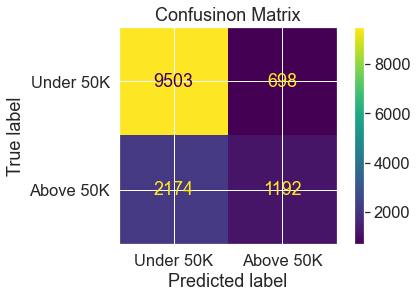

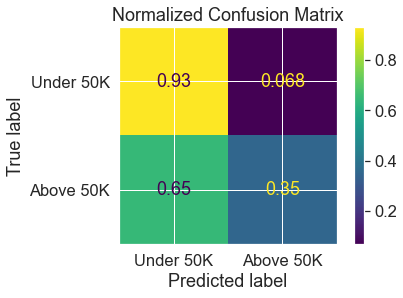

In [23]:
sns.set(font_scale=1.5)

#Raw CM
disp = plot_confusion_matrix(model_knn, x_test, y_test, 
                             display_labels=['Under 50K', 'Above 50K'])#plots the matrix
disp.ax_.set_title("Confusinon Matrix") #sets the title
plt.show()

#Normalised CM
disp = plot_confusion_matrix(model_knn, x_test, y_test, 
                             display_labels=['Under 50K', 'Above 50K'],
                             normalize='true') #plots the matrix
disp.ax_.set_title("Normalized Confusion Matrix") #sets the title
plt.show()


In [24]:
rep_cp = classification_report(y_test, y_test_pred,
                               target_names=target_title) #generates Classification Report
print(rep_cp)

              precision    recall  f1-score   support

   Below 50K       0.81      0.93      0.87     10201
   Above 50K       0.63      0.35      0.45      3366

    accuracy                           0.79     13567
   macro avg       0.72      0.64      0.66     13567
weighted avg       0.77      0.79      0.77     13567



In [25]:
from sklearn.metrics import recall_score, roc_auc_score, precision_score, f1_score

pd.DataFrame(data=[[accuracy_score(y_test, y_test_pred), recall_score(y_test,y_test_pred),
                   precision_score(y_test, y_test_pred),roc_auc_score(y_test, y_test_pred), f1_score(y_test, y_test_pred)]],
            columns=["accuracy","recall","precision","roc_auc_score","f1_score"],
            index=['Score'])

,accuracy,recall,precision,roc_auc_score,f1_score
Score,0.78831,0.35413,0.630688,0.642852,0.453577
